In [50]:
import copy
import matplotlib.pyplot as plt
import nashpy as nash
import numpy as np
import pandas as pd
import pathlib

import ambulance_game as abg
from main import (
    get_index_of_values,
    get_matrices,
    get_poa_values_for_given_strategies,
    run_replicator_dynamics_with_penalty,
    plot_asymmetric_replicator_dynamics_with_penalty,
    run_replicator_dynamics_with_dual_parameters,
    get_poa_values_for_given_strategies_dual_parameters,
    plot_asymmetric_replicator_dynamics_with_dual_parameters
)

In [48]:
problem_parameters_0 = {
    "lambda_2": 10.7,
    "lambda_1_1": 4.5,
    "lambda_1_2": 6,
    "mu_1": 2,
    "mu_2": 3,
    "num_of_servers_1": 3,
    "num_of_servers_2": 2,
    "system_capacity_1": 6,
    "system_capacity_2": 7,
    "buffer_capacity_1": 5,
    "buffer_capacity_2": 4,
    "target": 2,
    "alpha": 0.9,
}

## Getting the matrices

In [49]:
A_0, B_0, R_0 = abg.game.get_payoff_matrices(
    lambda_2=problem_parameters_0["lambda_2"],
    lambda_1_1=problem_parameters_0["lambda_1_1"],
    lambda_1_2=problem_parameters_0["lambda_1_2"],
    mu_1=problem_parameters_0["mu_1"],
    mu_2=problem_parameters_0["mu_2"],
    num_of_servers_1=problem_parameters_0["num_of_servers_1"],
    num_of_servers_2=problem_parameters_0["num_of_servers_2"],
    system_capacity_1=problem_parameters_0["system_capacity_1"],
    system_capacity_2=problem_parameters_0["system_capacity_2"],
    buffer_capacity_1=problem_parameters_0["buffer_capacity_1"],
    buffer_capacity_2=problem_parameters_0["buffer_capacity_2"],
    target=problem_parameters_0["target"],
    alpha=problem_parameters_0["alpha"],
)
A_0 += 1
B_0 += 1

# Asymmetric replicator dynamics behaviour

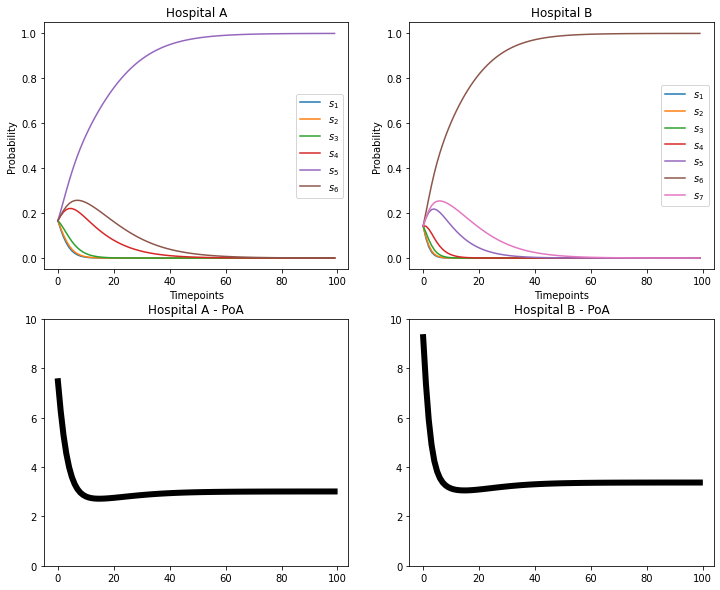

In [5]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R_0, 
    A=A_0, 
    B=B_0, 
    problem_parameters=problem_parameters_0,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 100000, 100), 
    penalty=None, 
    poa_plot_min=0, 
    poa_plot_max=10,
)
# plt.savefig("asymmetric_original.pdf")

## Flooding the system (increasing $\lambda_2$)

In [7]:
problem_parameters_1 = problem_parameters_0.copy()
problem_parameters_1["lambda_2"] = 24

In [8]:
A_1, B_1, R_1 = abg.game.get_payoff_matrices(
    lambda_2=problem_parameters_1["lambda_2"],
    lambda_1_1=problem_parameters_1["lambda_1_1"],
    lambda_1_2=problem_parameters_1["lambda_1_2"],
    mu_1=problem_parameters_1["mu_1"],
    mu_2=problem_parameters_1["mu_2"],
    num_of_servers_1=problem_parameters_1["num_of_servers_1"],
    num_of_servers_2=problem_parameters_1["num_of_servers_2"],
    system_capacity_1=problem_parameters_1["system_capacity_1"],
    system_capacity_2=problem_parameters_1["system_capacity_2"],
    buffer_capacity_1=problem_parameters_1["buffer_capacity_1"],
    buffer_capacity_2=problem_parameters_1["buffer_capacity_2"],
    target=problem_parameters_1["target"],
    alpha=problem_parameters_1["alpha"],
)
A_1 += 1
B_1 += 1

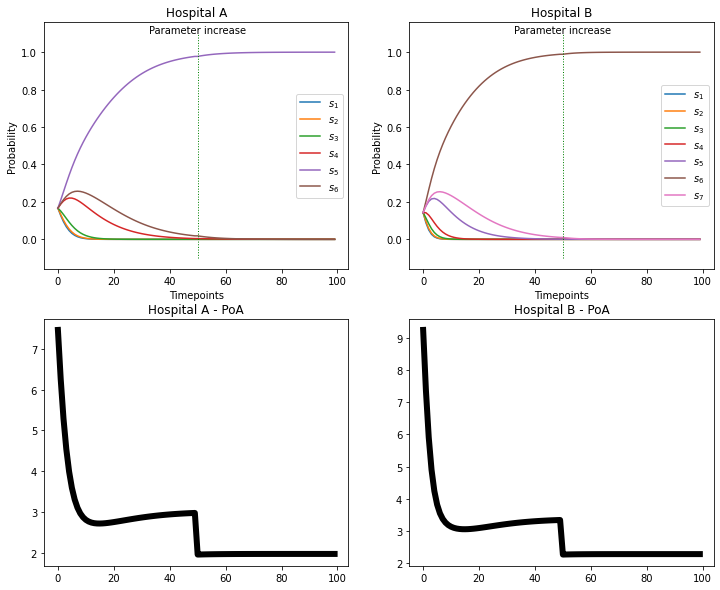

In [9]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R_0,
    A1=A_0,
    B1=B_0,
    R2=R_1,
    A2=A_1,
    B2=B_1,
    timepoints=np.linspace(1, 100000, 100),
    problem_parameters_1=problem_parameters_0,
    problem_parameters_2=problem_parameters_1,
    x_init=None,
    y_init=None,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)
# plt.savefig("asymmetric_flooding.pdf")

## Adding resources (increasing $C_A$ and $C_B$)

In [10]:
problem_parameters_2 = problem_parameters_0.copy()
problem_parameters_2["num_of_servers_1"] = 4
problem_parameters_2["num_of_servers_2"] = 3

In [11]:
A_2, B_2, R_2 = abg.game.get_payoff_matrices(
    lambda_2=problem_parameters_2["lambda_2"],
    lambda_1_1=problem_parameters_2["lambda_1_1"],
    lambda_1_2=problem_parameters_2["lambda_1_2"],
    mu_1=problem_parameters_2["mu_1"],
    mu_2=problem_parameters_2["mu_2"],
    num_of_servers_1=problem_parameters_2["num_of_servers_1"],
    num_of_servers_2=problem_parameters_2["num_of_servers_2"],
    system_capacity_1=problem_parameters_2["system_capacity_1"],
    system_capacity_2=problem_parameters_2["system_capacity_2"],
    buffer_capacity_1=problem_parameters_2["buffer_capacity_1"],
    buffer_capacity_2=problem_parameters_2["buffer_capacity_2"],
    target=problem_parameters_2["target"],
    alpha=problem_parameters_2["alpha"],
)
A_2 += 1
B_2 += 1

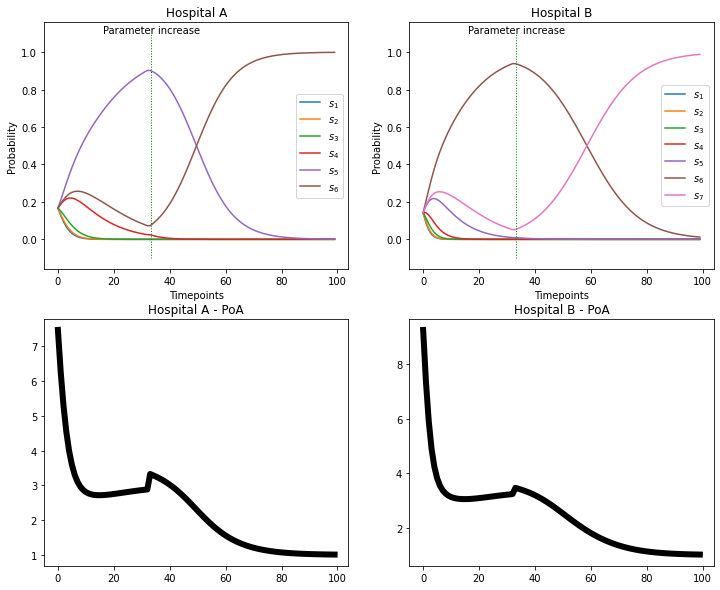

In [12]:
plot_asymmetric_replicator_dynamics_with_dual_parameters(
    R1=R_0,
    A1=A_0,
    B1=B_0,
    R2=R_2,
    A2=A_2,
    B2=B_2,
    timepoints=np.linspace(1, 100000, 100),
    divide=3,
    problem_parameters_1=problem_parameters_0,
    problem_parameters_2=problem_parameters_2,
    poa_plot_max=None,
    poa_plot_min=None,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
)
# plt.savefig("asymmetric_increase_C.pdf")

## Penalise strategies

$$
    A = 
    \begin{pmatrix}
        x & x & x & x \\
        x & x & x & x \\
        x & x & x & x \\    
    \end{pmatrix}, \;
    B = 
    \begin{pmatrix}
        y & y & y & y \\
        y & y & y & y \\
        y & y & y & y \\    
    \end{pmatrix}
$$

$$
    \tilde{A} = 
    \begin{pmatrix}
        x & x & x & x \\
        \rho x & \rho x & \rho x & \rho x \\
        x & x & x & x \\    
    \end{pmatrix}, \;
    \tilde{B} = 
    \begin{pmatrix}
        y & \rho y & y & y \\
        y & \rho y & y & y \\
        y & \rho y & y & y \\    
    \end{pmatrix}
$$

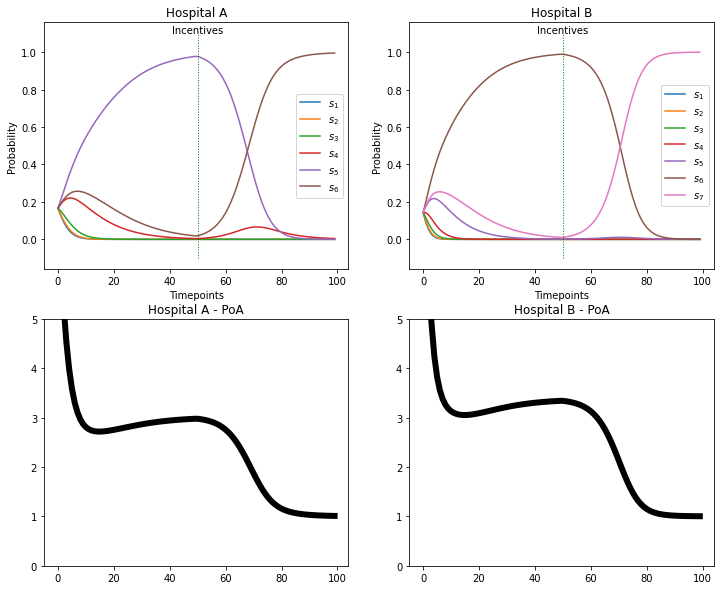

In [13]:
plot_asymmetric_replicator_dynamics_with_penalty(
    R=R_0,
    A=A_0,
    B=B_0,
    problem_parameters=problem_parameters_0,
    performance_measure_function=abg.markov.get_mean_blocking_time_using_markov_state_probabilities,
    timepoints=np.linspace(1, 100000, 100), 
    penalty=0.9997,
    poa_plot_min=0, 
    poa_plot_max=5,
)
# plt.savefig("asymmetric_penalty.pdf")

# Scaling matrices

In [40]:
np.min((A_0, B_0))

0.9987713298438848

In [41]:
matrices_scale = 10000
adding = 0.999

In [51]:
new_A = (copy.deepcopy(A_0) - adding) * matrices_scale
new_B = (copy.deepcopy(B_0) - adding) * matrices_scale

In [52]:
A_0_penalty = copy.deepcopy(A_0)
B_0_penalty = copy.deepcopy(B_0)
A_0_penalty[4, :] *= 0.9997
B_0_penalty[:, 5] *= 0.9997

In [53]:
new_A_penalty = (copy.deepcopy(A_0_penalty) - adding) * matrices_scale
new_B_penalty = (copy.deepcopy(B_0_penalty) - adding) * matrices_scale

In [54]:
new_A

array([[5.0518012 , 5.0518012 , 5.0518012 , 5.0518012 , 5.0518012 ,
        5.0518012 , 5.0518012 ],
       [5.49890724, 5.49778037, 5.49609583, 5.49240086, 5.48447375,
        5.46543486, 5.38753752],
       [6.8232937 , 6.81929222, 6.81501364, 6.80652813, 6.7871361 ,
        6.73340995, 6.49066808],
       [9.02983777, 9.02440336, 9.01875314, 9.00783769, 8.98277283,
        8.90820072, 8.51453068],
       [9.99961176, 9.99944092, 9.99923418, 9.99876193, 9.99729646,
        9.98935792, 9.85714026],
       [8.77400867, 8.80066168, 8.82494922, 8.86601376, 8.94387549,
        9.12954261, 9.71575003]])

\begin{equation*}
    A = 
    \begin{bmatrix}
        5.0518 & 5.0518 & 5.0518 & 5.0518 & 5.0518 &
        5.0518 & 5.0518 \\
        5.4989 & 5.4977 & 5.4960 & 5.4924 & 5.4844 &
        5.4654 & 5.3875 \\
        6.8232  & 6.8192 & 6.8150 & 6.8065 & 6.7871  &
        6.7334 & 6.4906 \\
        9.0298 & 9.0244 & 9.0187 & 9.0078 & 8.9827 &
        8.9082 & 8.5145 \\
        \color{blue}9.9996 & \color{blue}9.9994 & \color{blue}9.9992 & 
        \color{blue}9.9987 & \color{blue}9.9972 & \color{blue}9.9893 & 
        \color{blue}9.8571 \\
        8.7740 & 8.8006 & 8.8249 & 8.8660 & 8.9438 &
        9.1295 & 9.7157
    \end{bmatrix}
\end{equation*}

In [55]:
new_B

array([[1.71274091, 2.58227747, 4.61868784, 6.84974494, 8.94183653,
        9.99999428, 8.21486072],
       [1.71274091, 2.54776006, 4.56341806, 6.80470615, 8.9150126 ,
        9.99966231, 8.33580348],
       [1.71274091, 2.45289   , 4.37844599, 6.64413439, 8.82784463,
        9.99651716, 8.53064763],
       [1.71274091, 2.41419819, 4.28677516, 6.54705379, 8.76565852,
        9.99197415, 8.67459636],
       [1.71274091, 2.34153398, 4.09989765, 6.3265685 , 8.60586713,
        9.97164779, 8.9634134 ],
       [1.71274091, 2.12691143, 3.49305985, 5.48850456, 7.83530643,
        9.70754874, 9.73228713]])

\begin{equation*}
    B = 
    \begin{bmatrix}
        1.7127 & 2.5822 & 4.6186 & 6.8497 & 8.9418 &
        \color{red}9.9999 & 8.2148 \\
        1.7127 & 2.5477 & 4.5634 & 6.8047 & 8.9150  &
        \color{red}9.9996 & 8.3358 \\
        1.7127 & 2.4528    & 4.3784 & 6.6441 & 8.8278 &
        \color{red}9.9965 & 8.5306 \\
        1.7127 & 2.4141 & 4.2867 & 6.5470 & 8.7656 &
        \color{red}9.9919 & 8.6745 \\
        1.7127 & 2.3415 & 4.0998 & 6.3265 & 8.6058 &
        \color{red}9.9716 & 8.9634 \\
        1.7127 & 2.1269 & 3.4930 & 5.4885 & 7.8353 &
        \color{red}9.7075 & 9.7322 \\
    \end{bmatrix}
\end{equation*}

In [56]:
new_A_penalty

array([[5.0518012 , 5.0518012 , 5.0518012 , 5.0518012 , 5.0518012 ,
        5.0518012 , 5.0518012 ],
       [5.49890724, 5.49778037, 5.49609583, 5.49240086, 5.48447375,
        5.46543486, 5.38753752],
       [6.8232937 , 6.81929222, 6.81501364, 6.80652813, 6.7871361 ,
        6.73340995, 6.49066808],
       [9.02983777, 9.02440336, 9.01875314, 9.00783769, 8.98277283,
        8.90820072, 8.51453068],
       [6.99961188, 6.99944109, 6.99923441, 6.9987623 , 6.99729727,
        6.98936112, 6.85718312],
       [8.77400867, 8.80066168, 8.82494922, 8.86601376, 8.94387549,
        9.12954261, 9.71575003]])

\begin{equation*}
    \tilde{A} = 
    \begin{bmatrix}
        5.0518 & 5.0518 & 5.0518 & 5.0518 & 5.0518 &
        5.0518 & 5.0518  \\
        5.4989 & 5.4977 & 5.4960 & 5.4924 & 5.4844 &
        5.4654 & 5.3875 \\
        6.8232 & 6.8192 & 6.8150 & 6.8065 & 6.7871 &
        6.7334 & 6.4906 \\
        9.0298 & 9.0244 & 9.0187 & 9.0078 & 8.9827 &
        8.9082 & 8.5145 \\
        \color{blue}6.9996 & \color{blue}6.9994 & \color{blue}6.9992 & \color{blue}6.9987  & \color{blue}6.9972 &
        \color{blue}6.9893 & \color{blue}6.8571 \\
        8.7740 & 8.8006 & 8.8249 & 8.8660 & 8.9438 &
        9.1295 & 9.7157 \\
    \end{bmatrix}
\end{equation*}

In [57]:
new_B_penalty

array([[1.71274091, 2.58227747, 4.61868784, 6.84974494, 8.94183653,
        6.99999428, 8.21486072],
       [1.71274091, 2.54776006, 4.56341806, 6.80470615, 8.9150126 ,
        6.99966241, 8.33580348],
       [1.71274091, 2.45289   , 4.37844599, 6.64413439, 8.82784463,
        6.9965182 , 8.53064763],
       [1.71274091, 2.41419819, 4.28677516, 6.54705379, 8.76565852,
        6.99197656, 8.67459636],
       [1.71274091, 2.34153398, 4.09989765, 6.3265685 , 8.60586713,
        6.9716563 , 8.9634134 ],
       [1.71274091, 2.12691143, 3.49305985, 5.48850456, 7.83530643,
        6.70763647, 9.73228713]])

\begin{equation*}
    \tilde{B} = 
    \begin{bmatrix}
        1.7127 & 2.5822 & 4.6186 & 6.8497 & 8.9418 &
        \color{red}6.9999 & 8.2148 \\
        1.7127 & 2.5477 & 4.5634 & 6.8047 & 8.9150 &
        \color{red}6.9996 & 8.3358 \\
        1.7127 & 2.4528   & 4.3784 & 6.6441 & 8.8278 &
        \color{red}6.9965 & 8.5306 \\
        1.7127 & 2.4141 & 4.2867 & 6.5470 & 8.7656 &
        \color{red}6.9919 & 8.6745 \\
        1.7127 & 2.3415 & 4.0998 & 6.3265 & 8.6058 &
        \color{red}6.9716 & 8.9634  \\
        1.7127 & 2.1269 & 3.4930 & 5.4885 & 7.8353 &
        \color{red}6.7076 & 9.7322 \\
    \end{bmatrix}
\end{equation*}